<a href="https://colab.research.google.com/github/abhi161/Potato-Disease-classification/blob/master/Potato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
image_size = 256
batch_size= 32
data = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Project data/PlantVillage", shuffle=True,
                                                          image_size= (image_size,image_size),
                                                          batch_size= batch_size)

Found 2152 files belonging to 3 classes.


In [ ]:
data.class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(data)

68

Potato___healthy
Potato___Early_blight
Potato___healthy
Potato___Early_blight
Potato___Early_blight
Potato___Early_blight
Potato___Early_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight


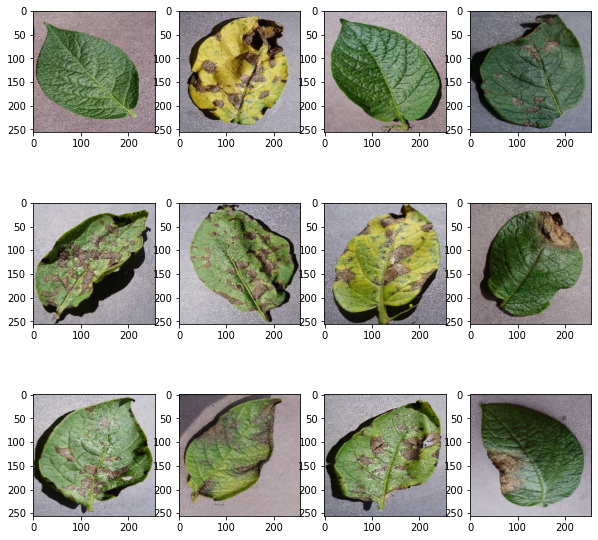

In [ ]:
plt.figure(figsize=(10,10))
for image, label in data.take(1):
    for i in range(12):
        ax =plt.subplot(3,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        print(data.class_names[label[i].numpy()])

### Splitting the data into:- Training, Validation, & Testing 

In [ ]:
def split_data(df, train_split =0.8, val_split = 0.1, test_split=0.1, shuffle=1000):
    
    if shuffle:
        df = df.shuffle(shuffle, seed=42)
        
        train_size = int(len(df)*train_split)
        train_data = df.take(train_size)
        
        val_size = int(len(df)* val_split)
        val_data =  df.skip(train_size).take(val_size)
        
        test_data = df.skip(train_size).skip(val_size)
    
    return train_data, val_data, test_data

In [ ]:
train_data, val_data, test_data = split_data(data)

In [ ]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_data = val_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

### Applying Preprocessing pipeline

In [ ]:
scaling= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")
])

### Model architecture

In [ ]:
input_shape = (batch_size,image_size,image_size,3)
model =models.Sequential([
            scaling,
            augmentation,
            layers.Conv2D(32,(3,3),activation="relu", input_shape=input_shape),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64,(3,3),activation="relu"),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64,(3,3),activation="relu"),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64,(3,3),activation="relu"),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64,(3,3),activation="relu"),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64,(3,3),activation="relu"),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64,activation='relu'),
            layers.Dense(3,activation='softmax'),
        ])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics='accuracy'
)

In [ ]:
history = model.fit(
    train_data,
    epochs=40,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_data
)

Epoch 1/40
54/54 [==============================] - 435s 177ms/step - loss: 0.9117 - accuracy: 0.4853 - val_loss: 0.8017 - val_accuracy: 0.5156
Epoch 2/40
54/54 [==============================] - 5s 90ms/step - loss: 0.7173 - accuracy: 0.6549 - val_loss: 0.7959 - val_accuracy: 0.5781
Epoch 3/40
54/54 [==============================] - 5s 90ms/step - loss: 0.5373 - accuracy: 0.7729 - val_loss: 0.6791 - val_accuracy: 0.6823
Epoch 4/40
54/54 [==============================] - 5s 91ms/step - loss: 0.3208 - accuracy: 0.8703 - val_loss: 0.2476 - val_accuracy: 0.8958
Epoch 5/40
54/54 [==============================] - 5s 90ms/step - loss: 0.3144 - accuracy: 0.8721 - val_loss: 0.3036 - val_accuracy: 0.8750
Epoch 6/40
54/54 [==============================] - 5s 90ms/step - loss: 0.2217 - accuracy: 0.9079 - val_loss: 0.1457 - val_accuracy: 0.9271
Epoch 7/40
54/54 [==============================] - 5s 89ms/step - loss: 0.1642 - accuracy: 0.9437 - val_loss: 0.3770 - val_accuracy: 0.8698
Epoch 8/40

In [ ]:
scores = model.evaluate(test_data)

8/8 [==============================] - 4s 35ms/step - loss: 0.0992 - accuracy: 0.9727


In [ ]:
acc =history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss =history.history['val_loss']

Text(0.5, 1.0, 'Training and validation accuracy')

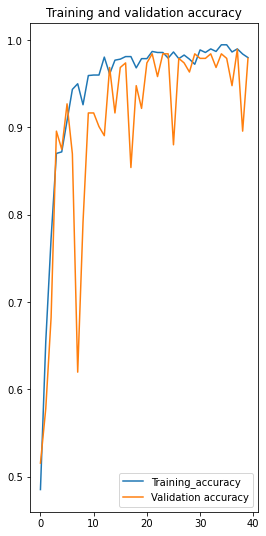

In [ ]:
epochs=40
plt.figure(figsize=(9,9))
ax =plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label= "Training_accuracy")
plt.plot(range(epochs),val_acc, label = "Validation accuracy")
plt.legend(loc ='lower_right')
plt.title("Training and validation accuracy")

actual label: Potato___Early_blight
1/1 [==============================] - 0s 135ms/step
Predicted label: Potato___Early_blight


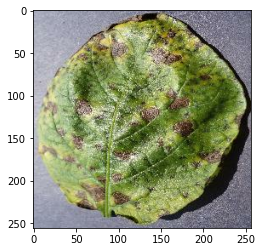

In [ ]:
import numpy as np

for test_image, test_label in test_data.take(1):
    first_label = test_label[0].numpy()
    plt.imshow(test_image[0].numpy().astype('uint8'))
    print("actual label:",data.class_names[first_label])
    
    batch_prediction = model.predict(test_image)
    
    print("Predicted label:",data.class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array,0)
    
    predicted = model.predict(img_array)
    
    predicted_class = data.class_names[np.argmax(predicted[0])]
    return predicted_class

1/1 [==============================] - 0s 15ms/step


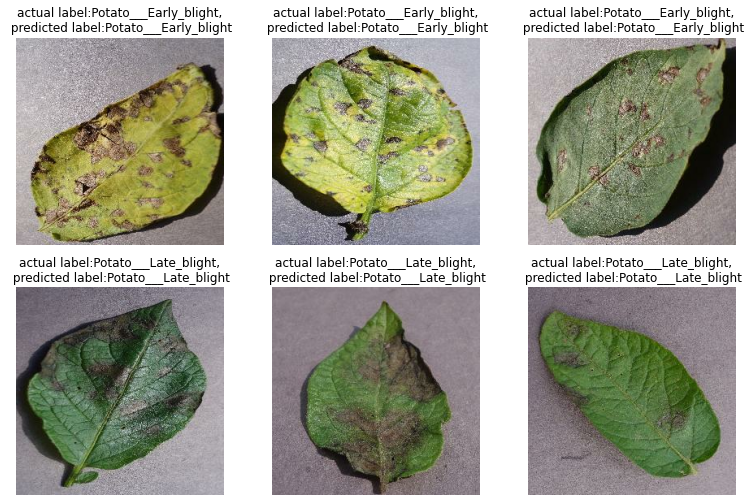

In [ ]:
plt.figure(figsize=(13,13))
for test_image, test_label in test_data.take(1):
    for i in range(6):
        plt.subplot(3,3, i+1)
        plt.imshow(test_image[i].numpy().astype('uint8'))
        
        actual_class = test_label[i]
        predicted_class = predict(model,test_image[i])
        plt.title(f"actual label:{data.class_names[actual_class]},\n predicted label:{predicted_class}")
       
        plt.axis(False)

        

In [ ]:
model.save("potatoes.h5")